(-0.5, 3015.5, 4031.5, -0.5)

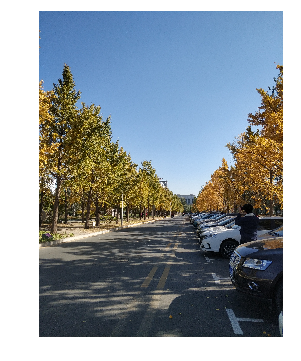

In [1]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
pic = imageio.imread('../Image/tree.jpg')
plt.figure(figsize = (6,6))
plt.imshow(pic)
plt.axis('off')

(-0.5, 3015.5, 4031.5, -0.5)

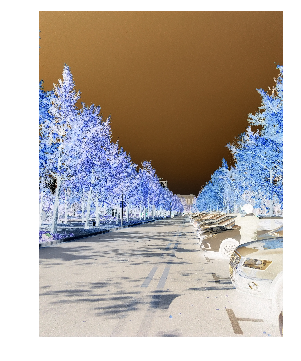

In [2]:
negative = 255 - pic
plt.figure(figsize=(6,6))
plt.imshow(negative)
plt.axis('off')

(-0.5, 3015.5, 4031.5, -0.5)

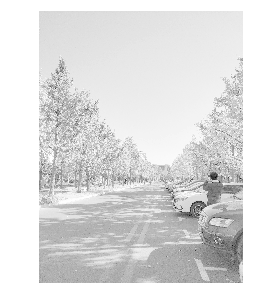

In [4]:
import numpy as np
gray = lambda rgb : np.dot(rgb[... , :3], [0.299, 0.587, 0.114])
gray = gray(pic)
max_ = np.max(gray)
def log_transform():
    return (255/np.log(1+max_)) * np.log(1+gray)
plt.figure(figsize = (5,5))
plt.imshow(log_transform(), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off')

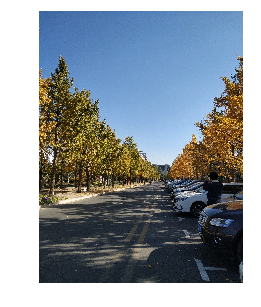

In [10]:
gamma = 0.9
gamma_correction = ((pic/255)**(1/gamma))
plt.figure(figsize=(5,5))
plt.imshow(gamma_correction)
plt.axis('off');

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


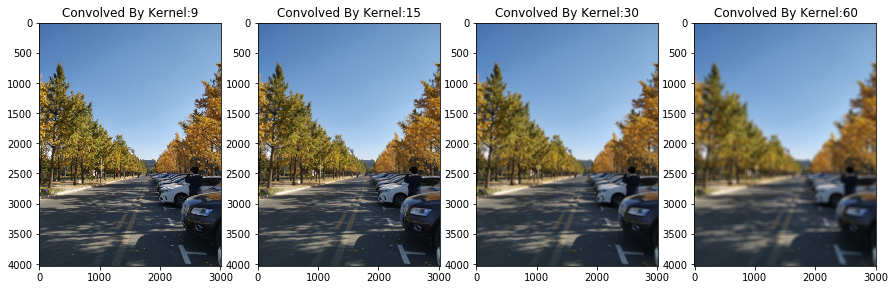

In [13]:
%time
from scipy.signal import convolve2d
def Convolution(image, kernel):
    conv_bucket = []
    for d in range(image.ndim):
        conv_channel = convolve2d(image[:,:,d], kernel, mode='same', boundary='symm')
        conv_bucket.append(conv_channel)
    return np.stack(conv_bucket, axis=2).astype('uint8')
kernel_sizes = [9,15,30,60]
fig, axs = plt.subplots(nrows = 1, ncols = len(kernel_sizes), figsize=(15,15));
for k, ax in zip(kernel_sizes, axs):
    kernel = np.ones((k,k))
    kernel /= np.sum(kernel)
    ax.imshow(Convolution(pic, kernel))
    ax.set_title("Convolved By Kernel:{}".format(k))

        